# Special thanks to 
https://www.chinahadoop.cn/course/1327

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
BATCH_SIZE = 500 
NOISE_DIM = 5

In [3]:
def get_gaussian_dist(mu, sigma): # the real data
    temp = np.random.normal(mu, sigma, size=BATCH_SIZE)[:, np.newaxis]
    return torch.from_numpy(temp).float()

In [4]:
def extract(v):
    return v.detach().storage().tolist()
def stats(d):
    return [np.mean(d), np.std(d)]

In [5]:
# Generator 
G = nn.Sequential(                      
    nn.Linear(NOISE_DIM, 128),            
    nn.ReLU(),
    nn.Linear(128, 1),                  
)

# Discriminator 
D = nn.Sequential(
    nn.Linear(1, 128),     
    nn.ReLU(),
    nn.Linear(128, 1),     
    nn.Sigmoid(),
)

In [6]:
opt_D = torch.optim.Adam(D.parameters(), lr=0.0001)
opt_G = torch.optim.Adam(G.parameters(), lr=0.0001)

In [7]:
for step in range(10000):
    # train discrimintor
    d_real_data = get_gaussian_dist(5, 2)    # real data
    noise = torch.randn(BATCH_SIZE, NOISE_DIM)  # random noise
    d_fake_data = G(noise)                      # fake data from G (generated from random ideas)

    prob_real_decision = D(d_real_data)          # D try to increase this prob
    prob_fake_decision = D(d_fake_data.detach()) # D try to reduce this prob
    
    D_loss = - torch.mean(torch.log(prob_real_decision) + torch.log(1. - prob_fake_decision))
    opt_D.zero_grad()
    D_loss.backward()
    opt_D.step()

    # train generator 
    noise = torch.randn(BATCH_SIZE, NOISE_DIM)  # random noise
    g_fake_data = G(noise)                      # fake data from G (generated from random ideas)
    prob_fake_decision = D(g_fake_data)         # G try to increase this prob
    
    G_loss = torch.mean(torch.log(1. - prob_fake_decision))
    opt_G.zero_grad()
    G_loss.backward()
    opt_G.step()

    if step % 500 == 0:  # plotting
        print("Epoch %s: ; Real Dist (%s),  Fake Dist (%s) " %
                  (step, stats(extract(d_real_data)), stats(extract(g_fake_data))))

Epoch 0: ; Real Dist ([4.754378428570926, 2.0421606758211825]),  Fake Dist ([-0.006194238744676113, 0.16176165834586295]) 
Epoch 500: ; Real Dist ([5.072915704256855, 1.9973613698641892]),  Fake Dist ([2.3585838866233826, 0.7329072071938686]) 
Epoch 1000: ; Real Dist ([4.893682318789884, 1.9501125463618412]),  Fake Dist ([5.194882173538208, 1.5318151304158054]) 
Epoch 1500: ; Real Dist ([4.916431605875492, 2.066867514969785]),  Fake Dist ([6.6444979500770565, 1.9038596500034735]) 
Epoch 2000: ; Real Dist ([4.9662396557331085, 2.0553511519615997]),  Fake Dist ([5.649089053630829, 1.7395965272522782]) 
Epoch 2500: ; Real Dist ([4.946271706409752, 2.0815274944605076]),  Fake Dist ([4.447126365661621, 1.4260829775714532]) 
Epoch 3000: ; Real Dist ([5.000876651793718, 1.9476810621945522]),  Fake Dist ([5.3105137553215025, 1.6775460452506743]) 
Epoch 3500: ; Real Dist ([5.040014942198992, 2.0388483714056633]),  Fake Dist ([5.045906022548675, 1.8113265907312417]) 
Epoch 4000: ; Real Dist ([5.

Plotting the generated distribution...


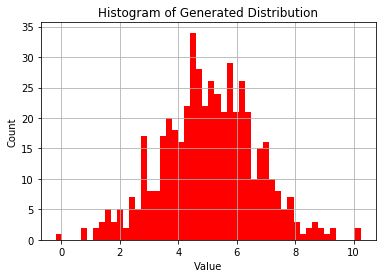

In [8]:
print("Plotting the generated distribution...")
values = extract(g_fake_data)
plt.hist(values, bins=50,color="red")
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram of Generated Distribution')
plt.grid(True)
plt.show()

Plotting the generated distribution...


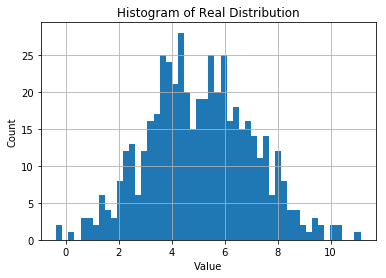

In [9]:
print("Plotting the generated distribution...")
values = extract(d_real_data)
plt.hist(values, bins=50)
plt.xlabel('Value')
plt.ylabel('Count')
plt.title('Histogram of Real Distribution')
plt.grid(True)
plt.show()